# Decision Tree

**A tree structure for classifying instances, distinguishing the category to which the target belongs by a multi-layer judgment**


## Essence：
A set of classification rules is generalized from the training dataset by multi-layer judgment

### Advantage: 
Algorithm based on "if else" digging, less calculation amount, faster

### Shortage: 
Ignore correlations between factors

# Entropy!

Measures the uncertainty of random variables(positively correlated)

Ent(D) = -$\sum^{|y|}_{k = 1}{p_k log_2p_k}$

When p_k=1, Ent(D)=0

Gain(D,a)=Ent(D)-$\sum^{V}_{v = 1}{Ent(D^v)}$

V is the num of elements, D is the current sample size, D^v is the number of element labeled as v

**We want to make the uncertainty of distribution as small as possible, so we find the least entropy**

## Anomaly Detection

Method to detect unexpected value

### Gaussian distribution
p(x) = 1/(\sigma * (2pi)^1/2)e^((x-miu)^2/(2\sigma^2))


**Normal Distribution in stat400**

## Dimensionality Reduction

Mainly use principal components analysis(Reduce data dimensionality with the least possible loss of information)

# Real Practice!!!

In [2]:
#Based on data, build the decision tree model
#Visualization
#Modify main_sample_leaf value, compare the result

In [27]:
#load data
import pandas as pd
import numpy as np
data=pd.read_csv('iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [28]:
#define X and y
X = data.drop(['target','label'],axis=1)
y=data.loc[:,'label']
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
#establish the decision tree model
from sklearn import tree
dc_tree = tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5)
dc_tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
#evaluate the model
y_predict = dc_tree.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.9733333333333334


[Text(248.0, 489.24, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(186.0, 380.52000000000004, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(310.0, 380.52000000000004, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(186.0, 271.8, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(124.0, 163.08000000000004, 'X[0] <= 5.15\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(62.0, 54.360000000000014, 'entropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(186.0, 54.360000000000014, 'entropy = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(248.0, 163.08000000000004, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(434.0, 271.8, 'X[2] <= 4.95\nentropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(372.0, 163.08000000000004, 'entropy = 0.65\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(496.0, 163.08000000000004, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

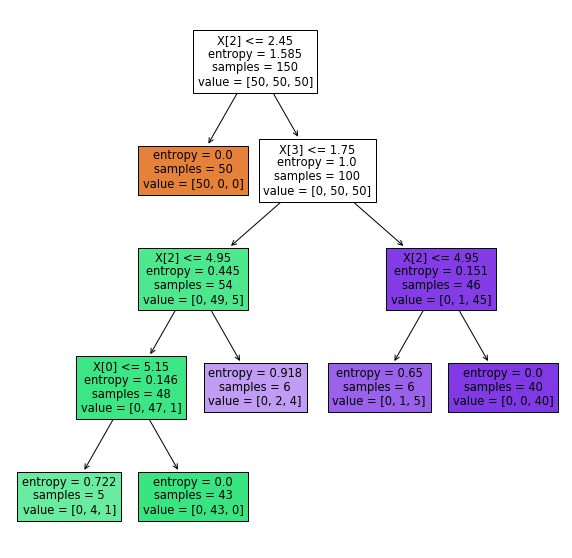

In [16]:
#visualize
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dc_tree,filled = 'True')

[Text(279.0, 498.3, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(236.07692307692307, 407.70000000000005, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(321.9230769230769, 407.70000000000005, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(171.69230769230768, 317.1, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(85.84615384615384, 226.5, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(42.92307692307692, 135.89999999999998, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(128.76923076923077, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(257.53846153846155, 226.5, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(214.61538461538458, 135.89999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(300.46153846153845, 135.89999999999998, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]')

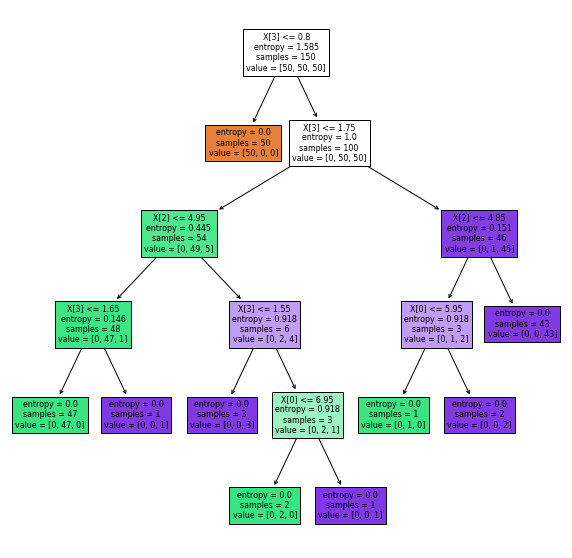

In [17]:
dc_tree = tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)
dc_tree.fit(X,y)
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dc_tree,filled = 'True')

In [30]:
#load anomaly data
import pandas as pd
import numpy as np
data2=pd.read_csv('anomaly_data.csv')
data2.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


Text(0, 0.5, 'x2')

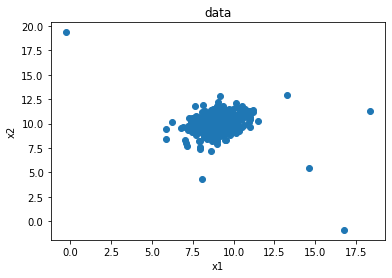

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(data2.loc[:,'x1'],data2.loc[:,'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')

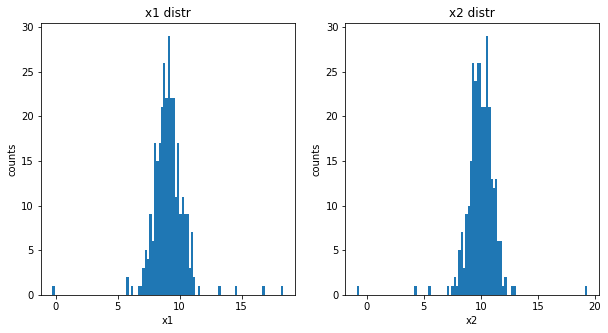

In [40]:
x1 = data2.loc[:,'x1']
x2 = data2.loc[:,'x2']
fig2= plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(x1,bins=100)
plt.title('x1 distr')
plt.xlabel('x1')
plt.ylabel('counts')
plt.subplot(122)
plt.hist(x2,bins=100)
plt.title('x2 distr')
plt.xlabel('x2')
plt.ylabel('counts')
plt.show()

In [41]:
# calculate the mean and sigma of x1 and x2
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print(x1_mean,x1_sigma,x2_mean,x2_sigma)

9.112225783931596 1.3559573758220915 9.997710507954396 1.3097071175386399


In [42]:
#calculate the gaussian ditsr p(x)
from scipy.stats import norm
x1_range = np.linspace(0,20,300)
x1_normal = norm.pdf(x1_range,x1_mean,x1_sigma)
x2_range = np.linspace(0,20,300)
x2_normal = norm.pdf(x2_range,x2_mean,x2_sigma)


Text(0.5, 1.0, 'normal p(x1)')

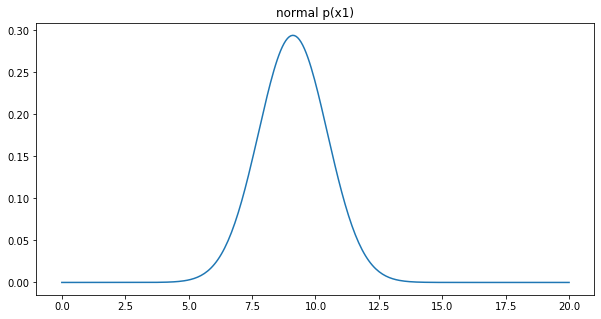

In [44]:
#visualize p(x)
fig2 = plt.figure(figsize=(10,5))
plt.plot(x1_range,x1_normal)
plt.title('normal p(x1)')

Text(0.5, 1.0, 'normal p(x2)')

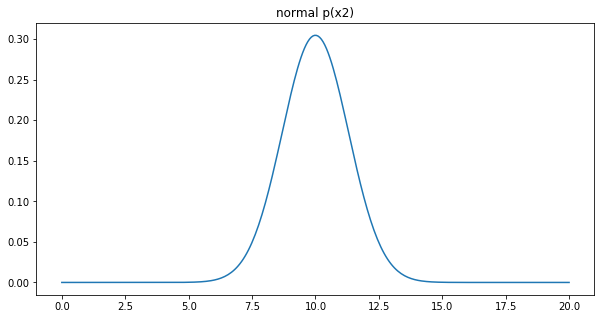

In [45]:
fig2 = plt.figure(figsize=(10,5))
plt.plot(x2_range,x2_normal)
plt.title('normal p(x2)')

In [46]:
#establish model and predict
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope()
ad_model.fit(data2)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

In [47]:
y_predict = ad_model.predict(data2)
print(y_predict)

[ 1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1]


In [49]:
print(pd.value_counts(y_predict))

 1    276
-1     31
dtype: int64


ValueError: x and y must be the same size

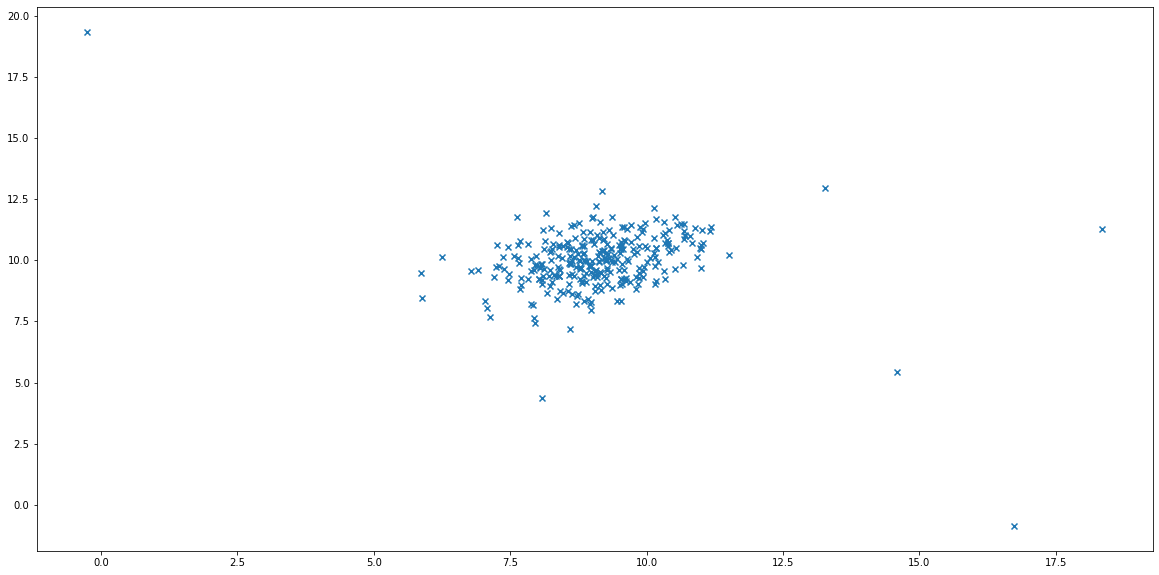

In [54]:
fig4 = plt.figure(figsize=(20,10))
plt.scatter(data2.loc[:,'x1'],data2.loc[:,'x2'],marker='x')
plt.scatter(data2.loc[:,'x1'][y_predict==-1],data2.loc[:,'x2'],marker='o',facecolor='none',edgecolor='red')

plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()